In [1]:
import numpy as np
import pandas as pd
from joblib import Parallel,delayed,dump
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
from cust_funcs import prepare_dataset,ams_curve_tuning,linear_impute_transform,linear_imputer,ams_curve,prepare_training_features

In [3]:
df=pd.read_csv('Data/training.csv')
X,weights,y=prepare_dataset(df)

In [4]:
parameters={
    'learning_rate':[0.01,0.05,0.1,1,1.2],
    'n_estimators':[50,100,150,200]
}

In [11]:
random_states=np.random.randint(10,100,8)
AMS_vals=[];N=[];LR=[]
for lr in parameters['learning_rate']:
    for n in parameters['n_estimators']:
        ADB=AdaBoostClassifier(n_estimators=n,learning_rate=lr)
        trial_vals=Parallel(n_jobs=4)(delayed(ams_curve_tuning)(X,y,weights,lr,n,random_states[i],ADB) for i in range(8))
        AMS_vals.append(np.mean(trial_vals));N.append(n);LR.append(lr) 
        
        print('Mean ams = {}, lr = {}, n = {}'.format(np.mean(trial_vals),lr,n))
        
LR=np.array(LR);AMS_vals=np.array(AMS_vals);N=np.array(N)        
print('BEST SCORES: ams = {}, lr = {}, n = {}'.format(max(AMS_vals),
                                                      LR[AMS_vals==max(AMS_vals)][0],N[AMS_vals==max(AMS_vals)][0]))

Mean ams = 2.0391210125094763, lr = 0.01, n = 50
Mean ams = 2.037570166907507, lr = 0.01, n = 100
Mean ams = 2.6348026068674586, lr = 0.01, n = 150
Mean ams = 2.670455126448005, lr = 0.01, n = 200
Mean ams = 2.7007001969083553, lr = 0.05, n = 50
Mean ams = 2.822087110308913, lr = 0.05, n = 100
Mean ams = 2.8714812991701795, lr = 0.05, n = 150
Mean ams = 2.8843340284920487, lr = 0.05, n = 200
Mean ams = 2.8189427835569907, lr = 0.1, n = 50
Mean ams = 2.888825043471292, lr = 0.1, n = 100
Mean ams = 2.8835949926171827, lr = 0.1, n = 150
Mean ams = 2.9347700096259812, lr = 0.1, n = 200
Mean ams = 2.4854615112535674, lr = 1, n = 50
Mean ams = 2.5059857503925276, lr = 1, n = 100
Mean ams = 2.5272338280015623, lr = 1, n = 150
Mean ams = 2.5432565970706893, lr = 1, n = 200
Mean ams = 2.446782436974116, lr = 1.2, n = 50
Mean ams = 2.4979825256615786, lr = 1.2, n = 100
Mean ams = 2.524806181815711, lr = 1.2, n = 150
Mean ams = 2.5410602454730977, lr = 1.2, n = 200
BEST SCORES: ams = 2.9347700096

### Fitting and Prediction

In [3]:
X_test,weights,y_test=prepare_dataset(pd.read_csv('Data/testing.csv',index_col=0))

X_train,_,y_train=prepare_dataset(pd.read_csv('Data/training.csv'))

X_test=prepare_training_features(X_test,X_dep=X_train)

In [7]:
ADA=AdaBoostClassifier(n_estimators=200,learning_rate=0.1)
ADA.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [8]:
prediction_proba=ADA.predict_proba(X_test)[:,1]

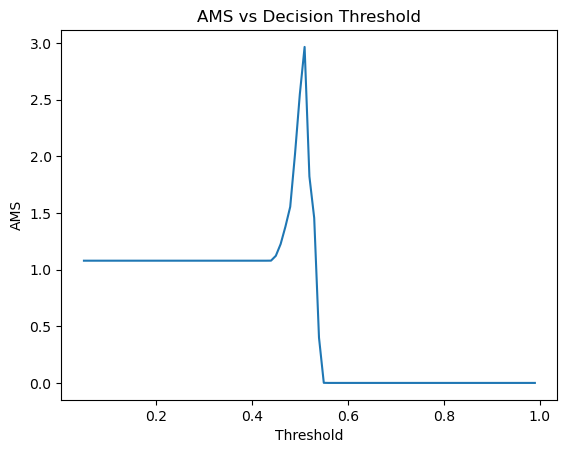

In [9]:
ams_dat,max_ams=ams_curve(prediction_proba,y_test,weights,test_ratio=1)

In [27]:
np.savetxt('Data/ADA_curve.csv',ams_dat)

In [28]:
print('Final AMS = {}'.format(max_ams))

Final AMS = 2.9662737575747773
